Important Library

In [2]:
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

Read CSV file

In [3]:
df = pd.read_csv("decision_tree_dataset.csv")
df.head

<bound method NDFrame.head of   Weather       Day Energy GoOut
0  آفتابی      شنبه   بالا   بله
1  بارانی      جمعه  پایین    نه
2    ابری    دوشنبه  متوسط   بله
3  آفتابی    یکشنبه  متوسط   بله
4  بارانی      شنبه   بالا    نه
5    ابری      جمعه   بالا   بله
6  آفتابی   سه‌شنبه  پایین    نه
7  بارانی  چهارشنبه  متوسط    نه
8    ابری      شنبه   بالا   بله
9  آفتابی  پنج‌شنبه   بالا   بله>

Pre Processing 

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for column in df.columns:
  df[column] = le.fit_transform(df[column])

print(df.head())

   Weather  Day  Energy  GoOut
0        0    3       0      0
1        2    0       2      1
2        1    1       1      0
3        0    6       1      0
4        2    3       0      1


Normalise Data

In [5]:
X = df[['Weather', 'Day', 'Energy']].values
y = df[["GoOut"]]
X

array([[0, 3, 0],
       [2, 0, 2],
       [1, 1, 1],
       [0, 6, 1],
       [2, 3, 0],
       [1, 0, 0],
       [0, 2, 2],
       [2, 5, 1],
       [1, 3, 0],
       [0, 4, 0]])

Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.3 )

Model

In [7]:
dec_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Predict

In [8]:
pred_tree = dec_tree.predict(X_test)

Evaluation

In [12]:
from sklearn import metrics

score =metrics.accuracy_score(y_test,pred_tree)

print(score)

1.0


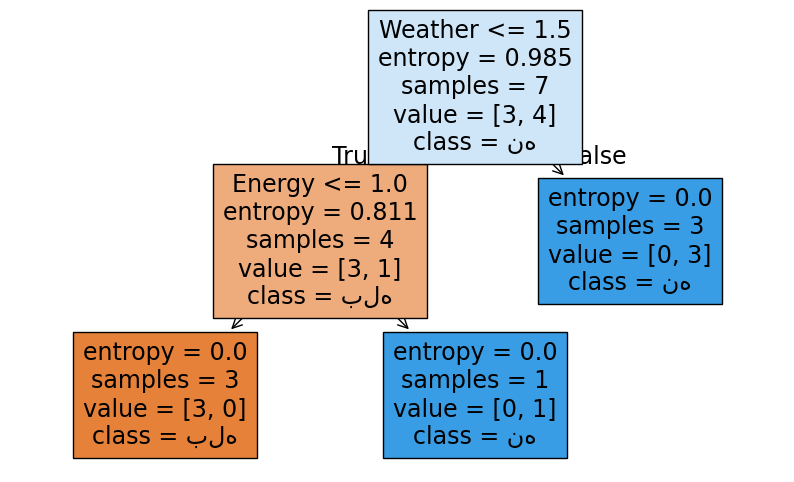

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(dec_tree, feature_names=df.columns[:-1], class_names=[ "بله" , "نه" ], filled=True)
plt.show()
